# WITH SEABORN

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
import warnings
warnings.filterwarnings('ignore') 

INSTRUCTIONS
1. Box and Swarm Plots in kill data
1. Most dangerous cities
1. Most dangerous states
1. Having mental ilness or not for killed people
1. Threat types
1. Flee types
<br>

read data

if didn't work you can use this parameters: encoding="windows-1252"

In [2]:
kill = pd.read_csv('PoliceKillingsUS.csv', encoding="windows-1252")

In [3]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [4]:
kill.dropna(inplace=True)
kill.shape

(2254, 14)

## 1a: Box plot of age in both genders separeted by manner of death.

In [5]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [6]:
kill.manner_of_death.value_counts().index

Index(['shot', 'shot and Tasered'], dtype='object')

**INSTRUCTION: Demonstrate the Qurtiles of age in both genders separeted by manner of death.**

In [7]:
kill.sample(3)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
103,141,Phillip Watkins,11/02/15,shot,knife,23.0,M,B,San Jose,CA,True,other,Not fleeing,False
2315,2574,Ronald Singletary,12/05/17,shot and Tasered,knife,51.0,M,B,Philadelphia,PA,False,other,Not fleeing,False
21,42,Tommy Smith,11/01/15,shot,gun,39.0,M,W,Arcola,IL,True,attack,Not fleeing,False


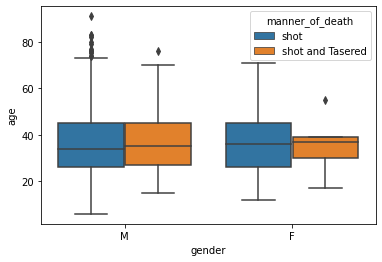

In [8]:
# with seaborn

sns.boxplot(x = "gender", y = "age",  hue = "manner_of_death", data = kill );

## 1b: Swarm Plot 

**INSTRUCTION: Demonstrate the age in both genders separeted by manner of death by a swarm plot.**

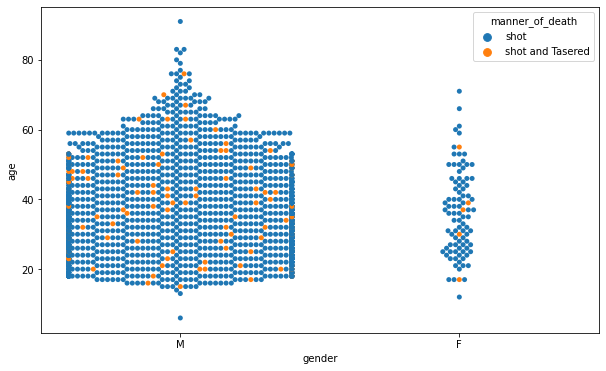

In [9]:
plt.figure(figsize = (10,6))

sns.swarmplot(x = "gender", y = "age",  hue = "manner_of_death", data = kill );

## 2: Plot 12 most dangerous cities

In [10]:
kill.sample(3)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
724,857,Robert Berger,23/09/15,shot,knife,48.0,M,O,Salt Lake City,UT,False,attack,Not fleeing,False
943,1090,Michael Thomason,14/12/15,shot,undetermined,56.0,M,W,Humboldt,TN,False,undetermined,Not fleeing,False
428,544,Mark Flores,11/06/15,shot,gun,28.0,M,H,Bexar County,TX,True,attack,Not fleeing,False


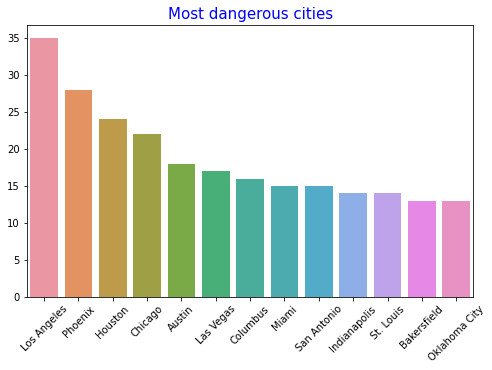

In [36]:
# with seaborn barplot

f, ax = plt.subplots(figsize= (8,5))
x = kill.city.value_counts()[:13].index
y = kill.city.value_counts()[:13].values
ax = sns.barplot(x,y);
ax.set_title("Most dangerous cities", color = "blue", fontsize = 15)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 45);

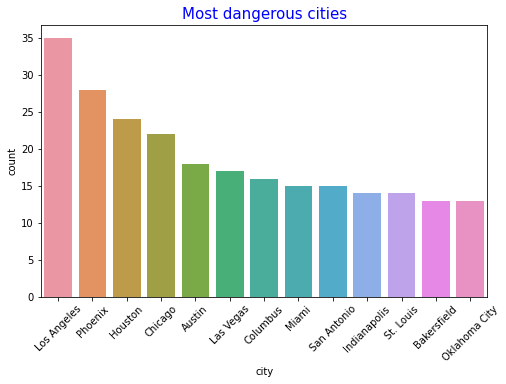

In [67]:
# with seaborn countplot

f, ax = plt.subplots(figsize= (8,5))

ax = sns.countplot(x = kill.city, order = kill.city.value_counts().index[:13]);
ax.set_title("Most dangerous cities", color = "blue", fontsize = 15)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 45);


## 3: Plot 20 most dangerous states

In [50]:
kill.sample(3)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
2059,2288,Johnnie J. Harris,04/02/17,shot,gun,68.0,M,B,Kansas City,MO,False,attack,Not fleeing,False
961,1109,Bobby Daniels,21/12/15,shot,gun,48.0,M,B,Douglasville,GA,False,attack,Not fleeing,False
1068,1220,Bruce Kelley,31/01/16,shot and Tasered,knife,37.0,M,B,Wilkinsburg,PA,True,attack,Not fleeing,False


In [64]:
x = kill.state.value_counts()[:20]
x

CA    366
TX    200
FL    136
AZ    105
OH     70
NC     66
OK     65
CO     63
GA     61
MO     58
TN     56
IL     56
WA     51
LA     47
AL     45
PA     45
NY     43
VA     43
WI     42
NM     41
Name: state, dtype: int64

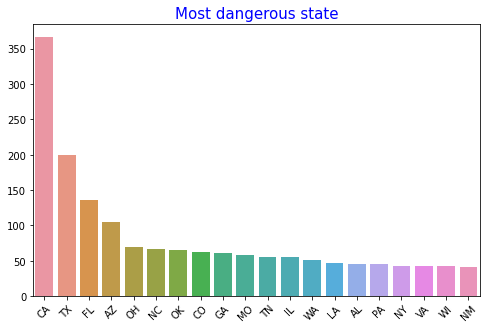

In [69]:
# with seaborn barplot

f, ax = plt.subplots(figsize= (8,5))
x = kill.state.value_counts()[:20].index
y = kill.state.value_counts()[:20].values
ax = sns.barplot(x,y);
ax.set_title("Most dangerous state", color = "blue", fontsize = 15)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 45);

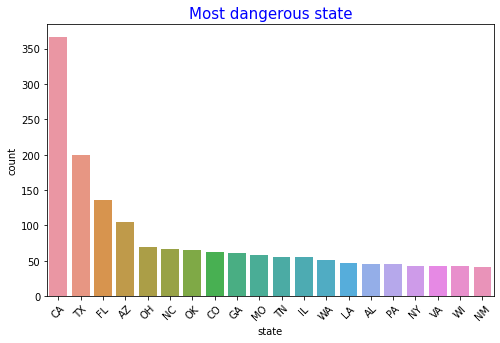

In [71]:
# with seaborn countplot

f, ax = plt.subplots(figsize= (8,5))
ax = sns.countplot(x = kill.state, order = kill.state.value_counts().index[:20]);
ax.set_title("Most dangerous state", color = "blue", fontsize = 15)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 45);

## 4: Plot Having mental ilness or not for killed people

In [72]:
kill.sample(3)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
739,875,Victor Oswaldo Coronado-Martinez,27/09/15,shot,gun,40.0,M,H,Ponder,TX,False,attack,Not fleeing,False
498,622,Rocco Joseph Palmisano,09/07/15,shot,gun,50.0,M,W,Parowan,UT,False,attack,Not fleeing,False
2127,2370,David Lee Montano,23/02/17,shot,gun,33.0,M,H,Newton,KS,False,attack,Not fleeing,False


In [73]:
kill.signs_of_mental_illness.value_counts()

False    1681
True      573
Name: signs_of_mental_illness, dtype: int64

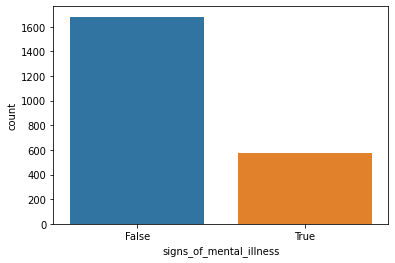

In [83]:
# with seaborn

sns.countplot(kill.signs_of_mental_illness);

## 5: Plot number of Threat Types

In [84]:
kill.threat_level.value_counts()

attack          1462
other            677
undetermined     115
Name: threat_level, dtype: int64

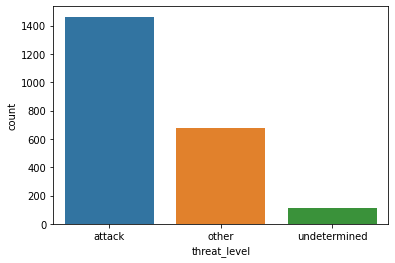

In [89]:
# with seaborn
sns.countplot(kill.threat_level);

## 6: Plot number of Flee Types

In [90]:
kill.flee.value_counts()

Not fleeing    1528
Car             360
Foot            278
Other            88
Name: flee, dtype: int64

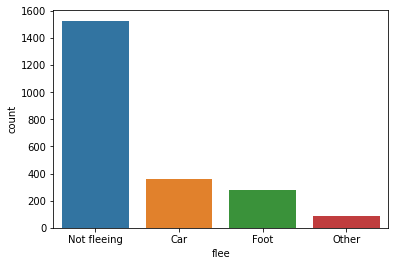

In [91]:
# with seaborn
sns.countplot(kill.flee)